# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
import rpy2

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load the resident and progenitor subsets

In [3]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20200718.h5ad')

In [4]:
adata.raw = adata

In [5]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T cell             327
CD8 T cell             171
CD14 monocyte         8787
CD56 bright NK         450
CMP                    425
                      ... 
schwann cells            9
sinusoidal EC          550
stromal macrophage    1493
tDC                    193
tip EC                 363
Length: 64, dtype: int64

In [6]:
celltypes = ['adipo-CAR', 'arteriolar fibroblast', 'tip EC', 'stromal macrophage', 'sinusoidal EC', 
                      'schwann cells', 'proliferating EC', 'osteoclast', 'osteochondral precursor', 
                      'osteoblast precursor',                                        
                     'osteoblast', 'myofibroblast', 'muscle stem cell', 'muscle', 'monocytoid macrophage',  
                     'EI macrophage', 'immature EC', 'endosteal fibroblast', 'early osteoblast', 'chondrocyte','HSC']

In [7]:
adata = adata[adata.obs['cell.labels'].isin(celltypes)].copy()

In [8]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
HSC                          92
adipo-CAR                   359
arteriolar fibroblast        84
chondrocyte                  81
early osteoblast            291
endosteal fibroblast         54
immature EC                  69
monocytoid macrophage       296
muscle                      219
muscle stem cell            255
myofibroblast                78
osteoblast                  375
osteoblast precursor        463
osteochondral precursor     191
osteoclast                 1378
proliferating EC             26
schwann cells                 9
sinusoidal EC               550
stromal macrophage         1493
tip EC                      363
dtype: int64

In [9]:
adata.shape

(6726, 33712)

# Pre-process the dataset

In [10]:
# normalise count data 
sc.pp.normalize_total(adata)

In [11]:
# log the count data 
sc.pp.log1p(adata)

In [12]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [13]:
# scale the data 
sc.pp.scale(adata, max_value=10)

In [14]:
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

# Run violin plot (1) for stroma signalling to HSC

In [15]:
HSC_to_HSC_genes_pt1 = ['KRT19',
'KRT19',
'KRT19',
'KRT19',
'FZD6',
'HLA-DPA1',
'KRT19',
'PLAUR',
'PLXNC1',
'HLA-DPB1',
'ICAM3',
'KRT19',
'LAIR1',
'SPN',
'TNFRSF1A', 
'TNFRSF1B']

HSC_to_HSC_genes_pt2 = ['SELL',
'CD44',
'ESAM',
'FGFR1',
'KIT',
'MERTK',
'NOTCH1',
'NOTCH2',
'KRT19',
'NPR2',
'KRT19',
'NPR3',
'TNFRSF10C',
'CD46',
'FLT3',
'JAM3']

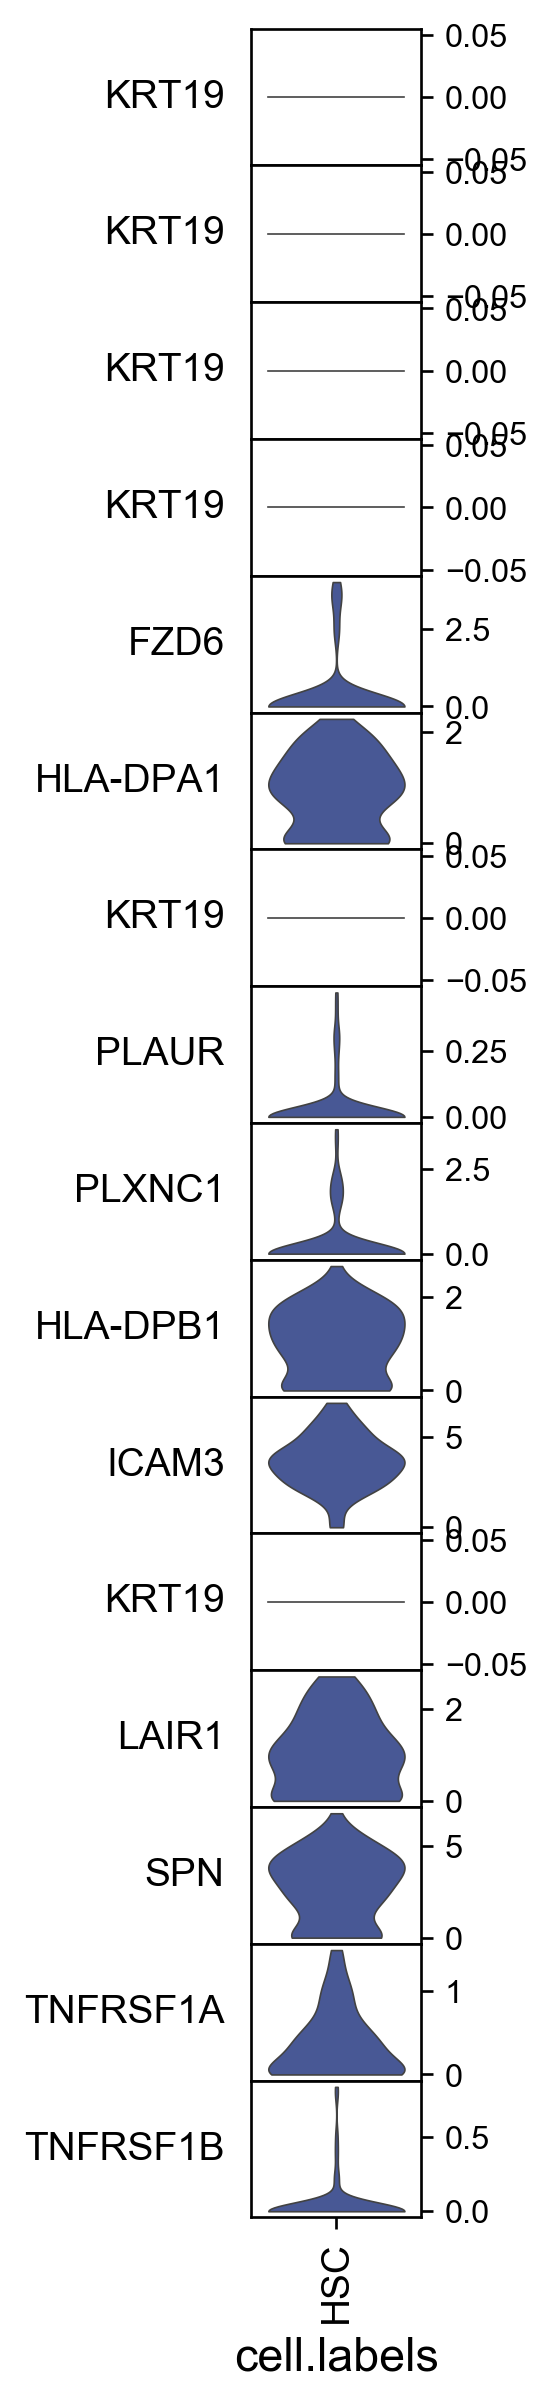

In [16]:
genes = HSC_to_HSC_genes_pt1

subset = adata[adata.obs['cell.labels'].isin(["HSC"])].copy()

sc.pl.stacked_violin(subset, var_names=genes, save="cpdb_to_hsc_progen_genes_pt1_violin_20200722.pdf", 
                     rotation=90, 
                     groupby='cell.labels', use_raw=False, swap_axes=True, figsize=(1,12), 
                     row_palette="#3B50A2")

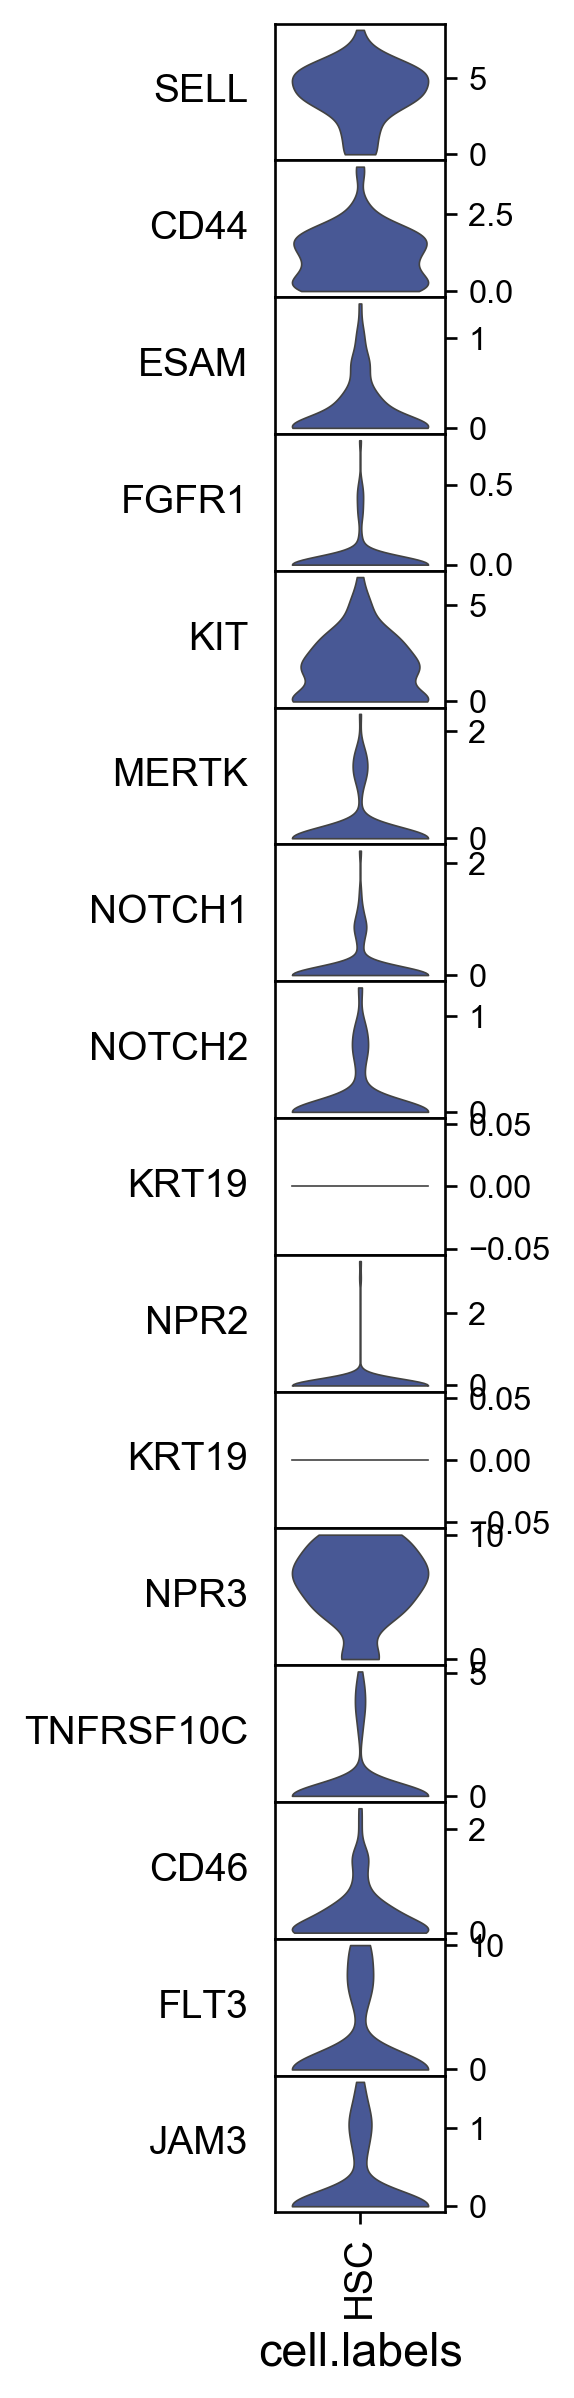

In [17]:
genes = HSC_to_HSC_genes_pt2

subset = adata[adata.obs['cell.labels'].isin(["HSC"])].copy()

sc.pl.stacked_violin(subset, var_names=genes, save="cpdb_to_hsc_progen_genes_pt2_violin_20200722.pdf", 
                     rotation=90, 
                     groupby='cell.labels', use_raw=False, swap_axes=True, figsize=(1,12), 
                     row_palette="#3B50A2")

# Run violin plot (2) for stroma signalling to HSC

In [18]:
stromal_to_HSC_genes_pt1 = ["CD34", "SELE", "ESAM", "FGF7", "KITLG", "GAS6", "DLK1", "DLL4", "JAG2", "VEGFA", 
                            "SEMA3F", "NPPC", "TNFSF10", "JAG1", "FLT3LG", "JAM3"]

stromal_to_HSC_genes_pt2 = ["PGF", "FGFR2", "HBEGF", "NCAM1", "WNT5A", "TNFSF9", "GAL", "ITGA4", "SEMA7A", 
                           "TNFSF13B", "CD209", "ITGAM", "LILRB4", "SIGLEC1", "GRN"]

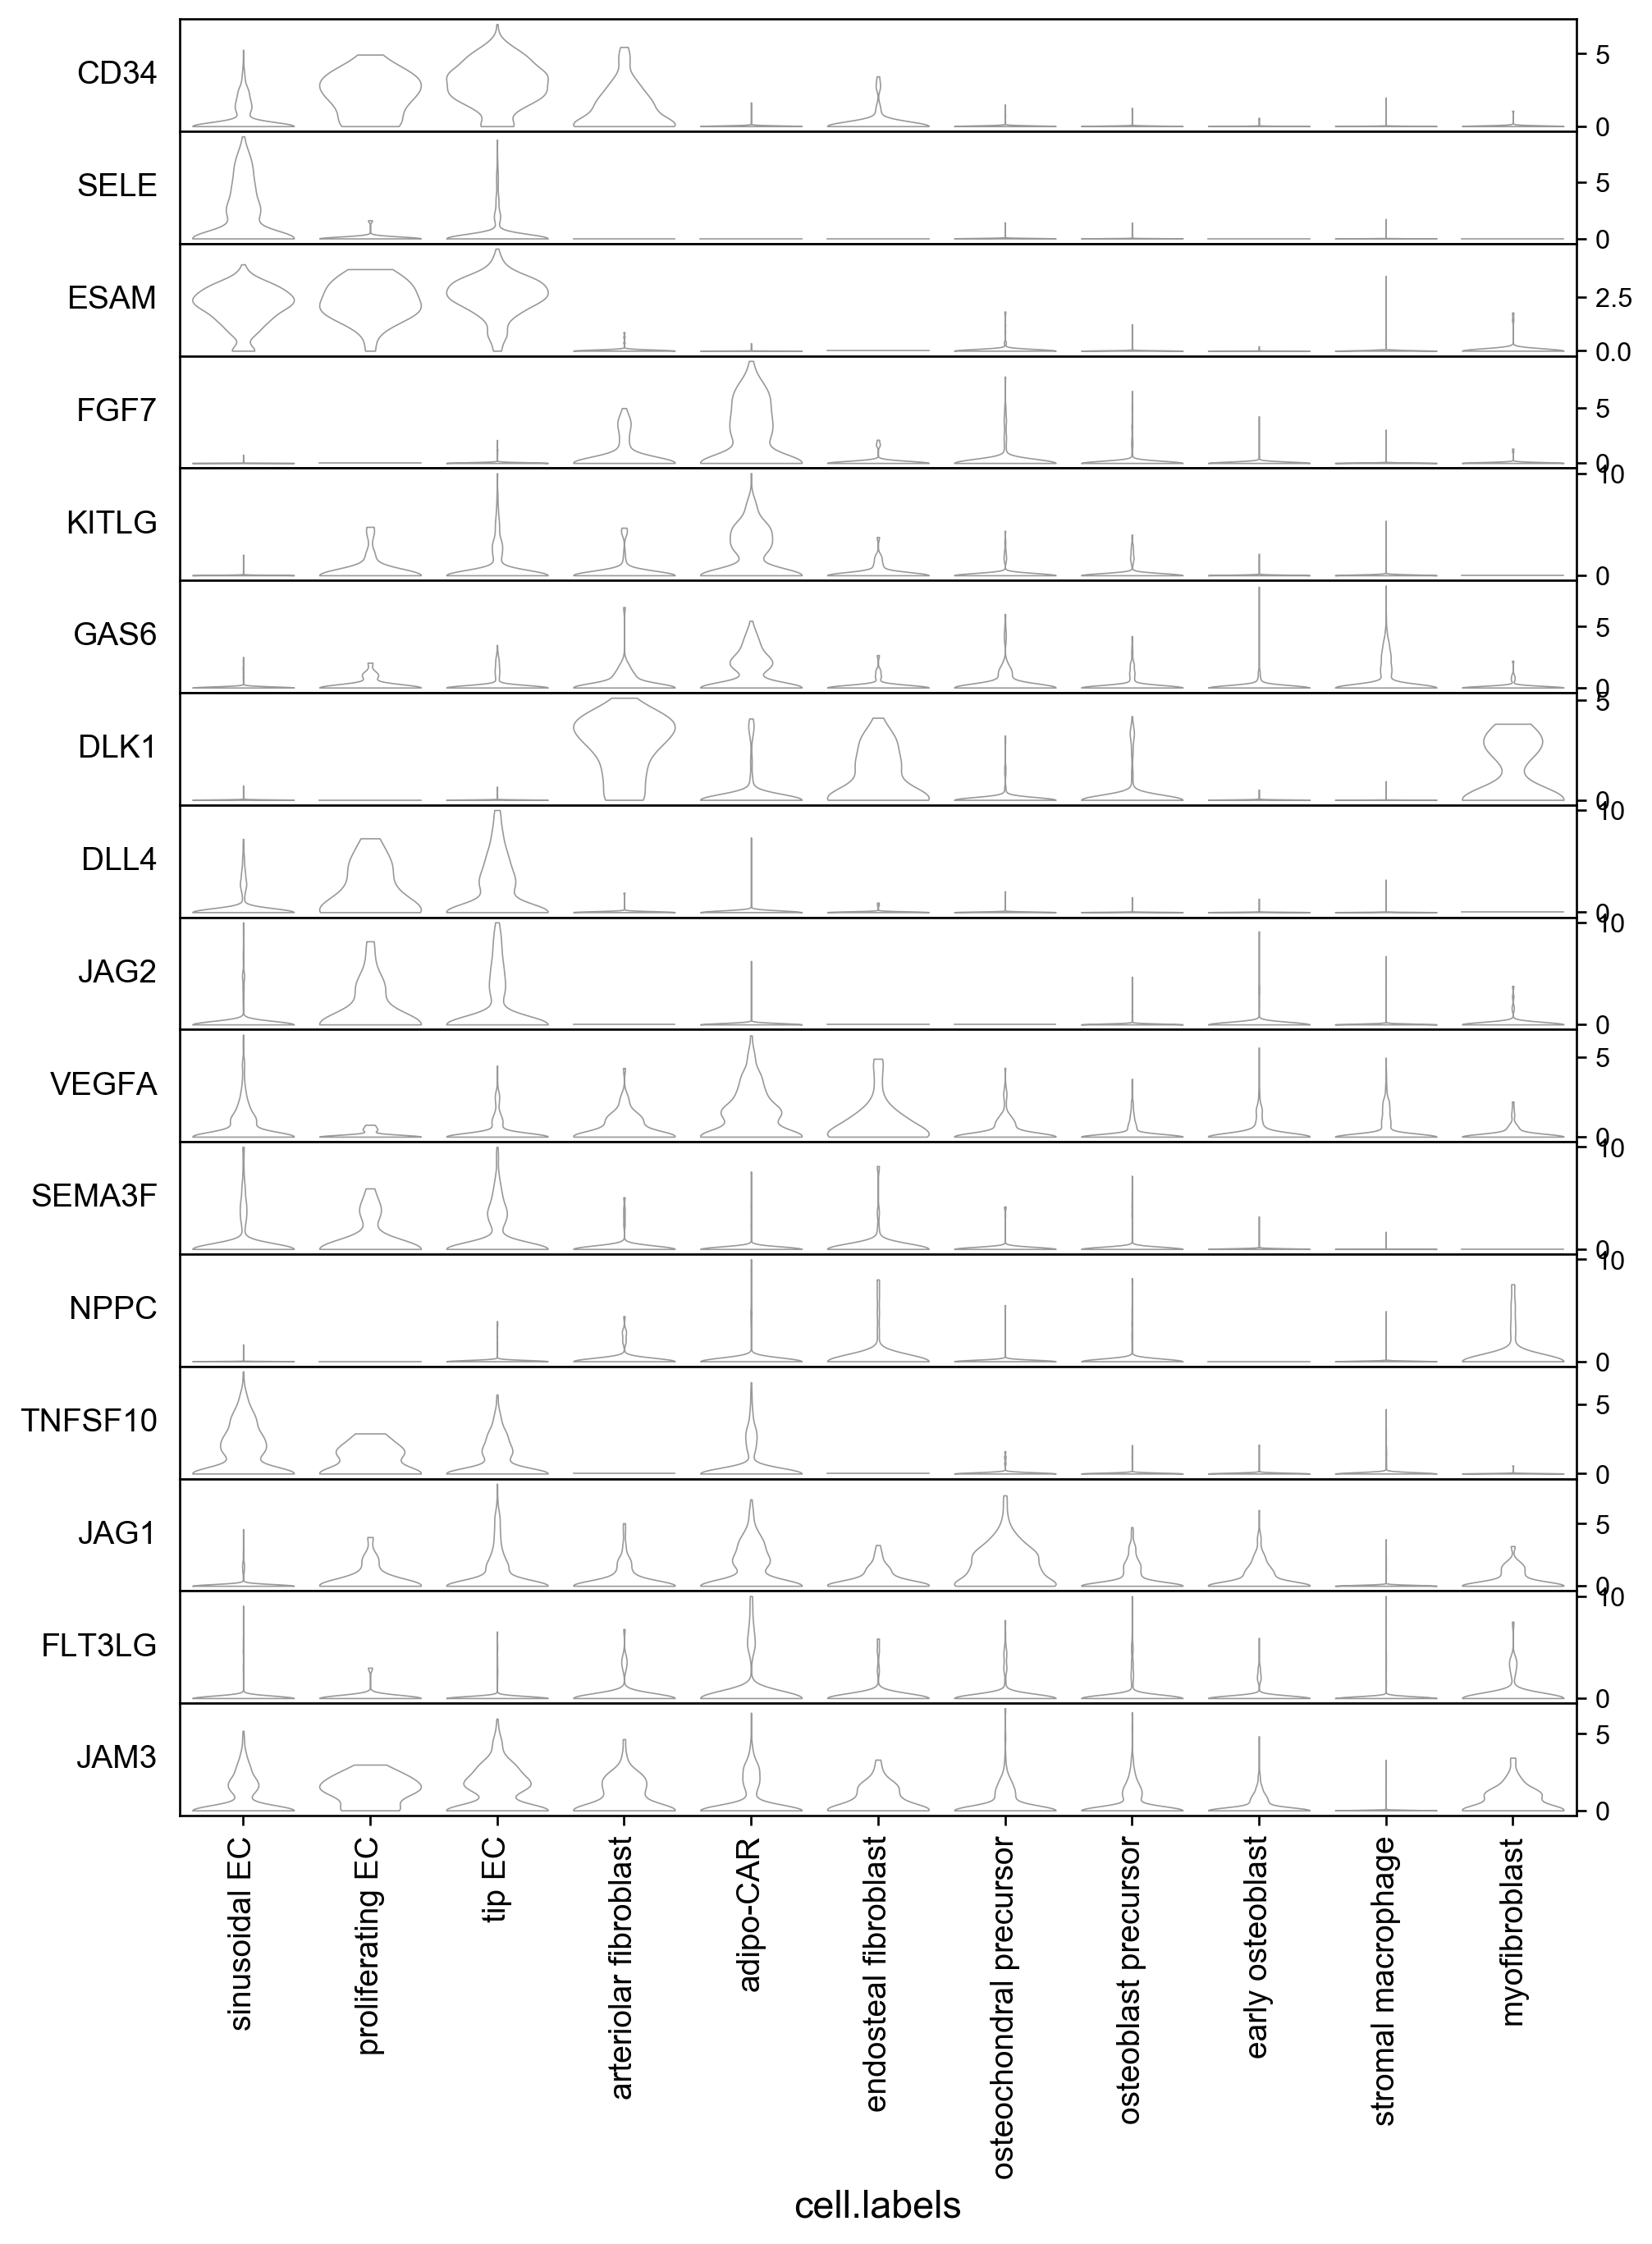

In [19]:
subset = adata[adata.obs['cell.labels'].isin(['sinusoidal EC', 'proliferating EC', 'tip EC', 'arteriolar fibroblast',
            'adipo-CAR', 'endosteal fibroblast', 'osteochondral precursor', 'osteoblast precursor', 'early osteoblast',
            'stromal macrophage', 'myofibroblast'])].copy()

subset.obs["cell.labels"] = subset.obs["cell.labels"].cat.reorder_categories(['sinusoidal EC', 'proliferating EC', 'tip EC', 'arteriolar fibroblast',
            'adipo-CAR', 'endosteal fibroblast', 'osteochondral precursor', 'osteoblast precursor', 'early osteoblast',
            'stromal macrophage', 'myofibroblast'])

genes = stromal_to_HSC_genes_pt1
sc.pl.stacked_violin(subset, var_names=genes, save="cpdb_stromal_to_hsc_progen_genes_group1_violin_20200722.pdf", 
                     rotation=90, 
                     groupby='cell.labels', use_raw=False, swap_axes=True, figsize=(10,12), 
                     row_palette=['#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', 
                                 '#ffffff', '#ffffff', '#ffffff', '#ffffff'])

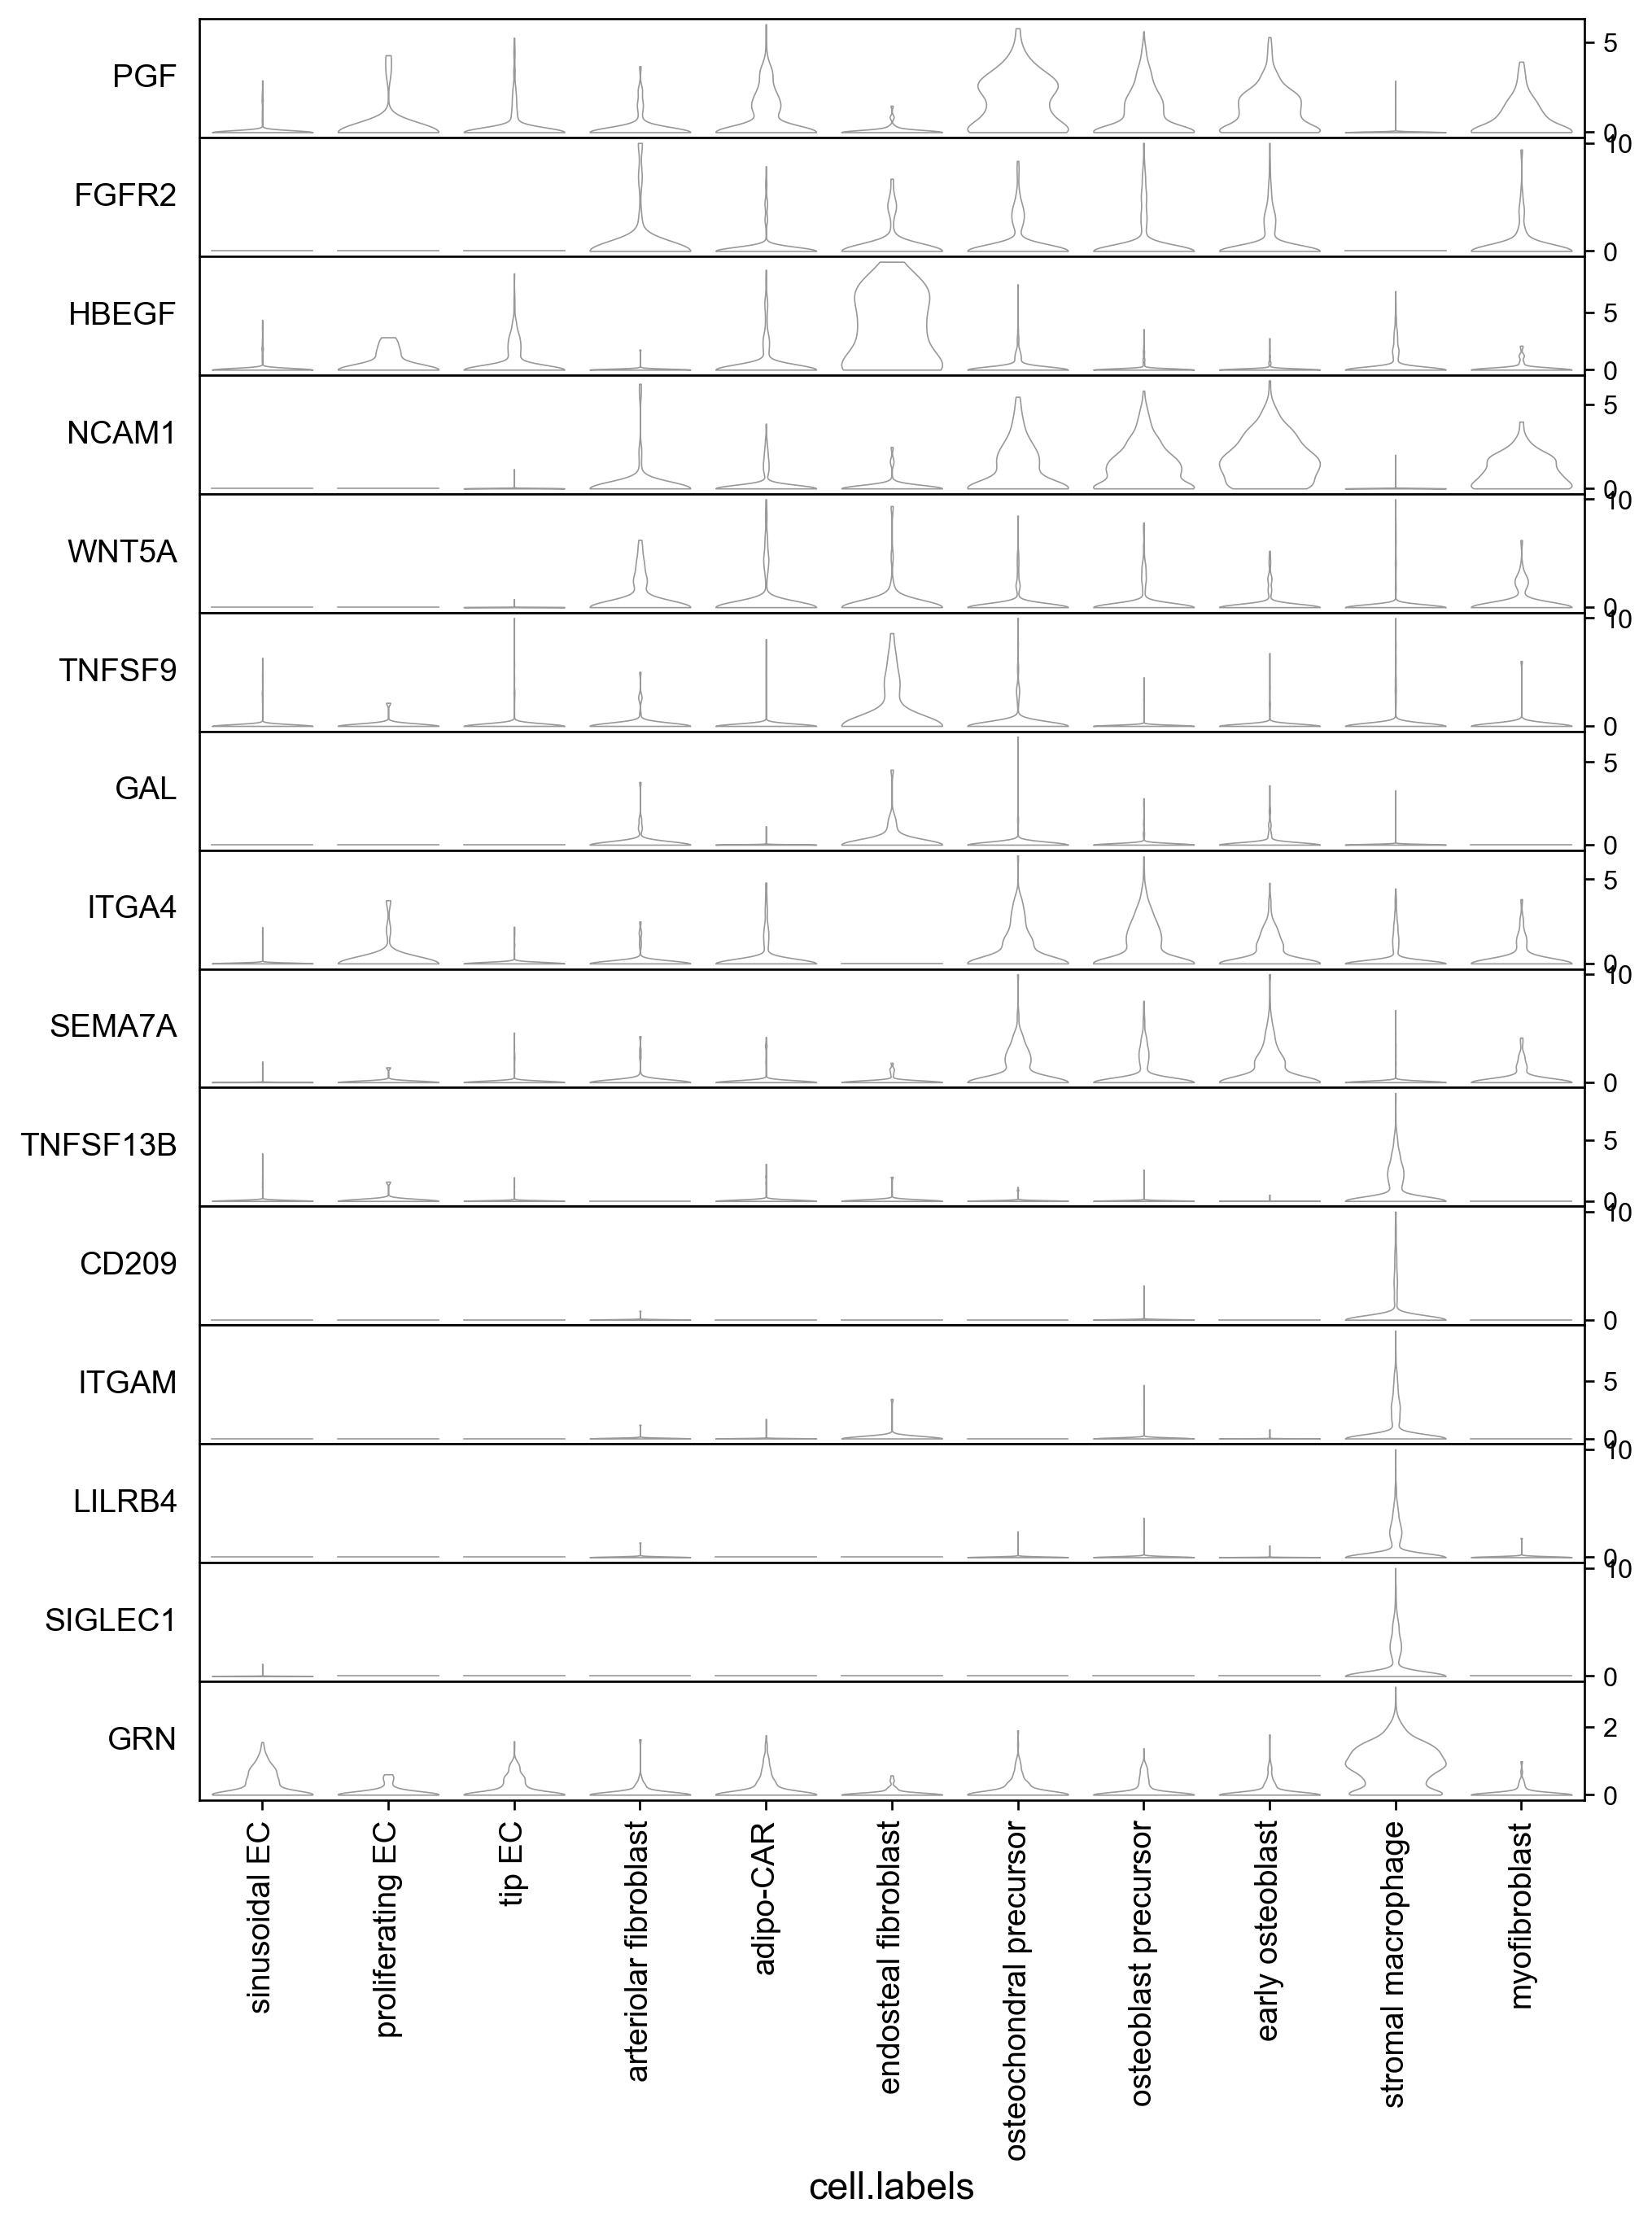

In [20]:
subset = adata[adata.obs['cell.labels'].isin(['sinusoidal EC', 'proliferating EC', 'tip EC', 'arteriolar fibroblast',
            'adipo-CAR', 'endosteal fibroblast', 'osteochondral precursor', 'osteoblast precursor', 'early osteoblast',
            'stromal macrophage', 'myofibroblast'])].copy()

subset.obs["cell.labels"] = subset.obs["cell.labels"].cat.reorder_categories(['sinusoidal EC', 'proliferating EC', 'tip EC', 'arteriolar fibroblast',
            'adipo-CAR', 'endosteal fibroblast', 'osteochondral precursor', 'osteoblast precursor', 'early osteoblast',
            'stromal macrophage', 'myofibroblast'])

genes = stromal_to_HSC_genes_pt2
sc.pl.stacked_violin(subset, var_names=genes, save="cpdb_stromal_to_hsc_progen_genes_group2_violin_20200722.pdf", 
                     rotation=90, 
                     groupby='cell.labels', use_raw=False, swap_axes=True, figsize=(10,12), 
                     row_palette=['#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', 
                                 '#ffffff', '#ffffff', '#ffffff', '#ffffff'])

# Run violin plot (1) HSC signalling to stroma 

In [21]:
HSC_from_HSC_genes = ['SLC1A5',
'ITGA1', 'ITGB1',
'ITGA1', 'ITGB1',
'ITGA1', 'ITGB1',
'ITGA1', 'ITGB1',
'ITGA1', 'ITGB1',
'TEK',
'NOTCH4',
'ITGA2', 'ITGB1',
'ITGA2', 'ITGB1',
'ITGA2', 'ITGB1',
'ITGA2', 'ITGB1',
'ITGA2', 'ITGB1',
'ITGA2', 'ITGB1',
'COLEC12',
'NOTCH3',
'NOTCH3',
'EPHA3',
'ITGA10', 'ITGB1',
'ITGA10', 'ITGB1',
'ITGA10', 'ITGB1',
'ITGA10', 'ITGB1',
'ITGA10', 'ITGB1',
'SIGLEC10']

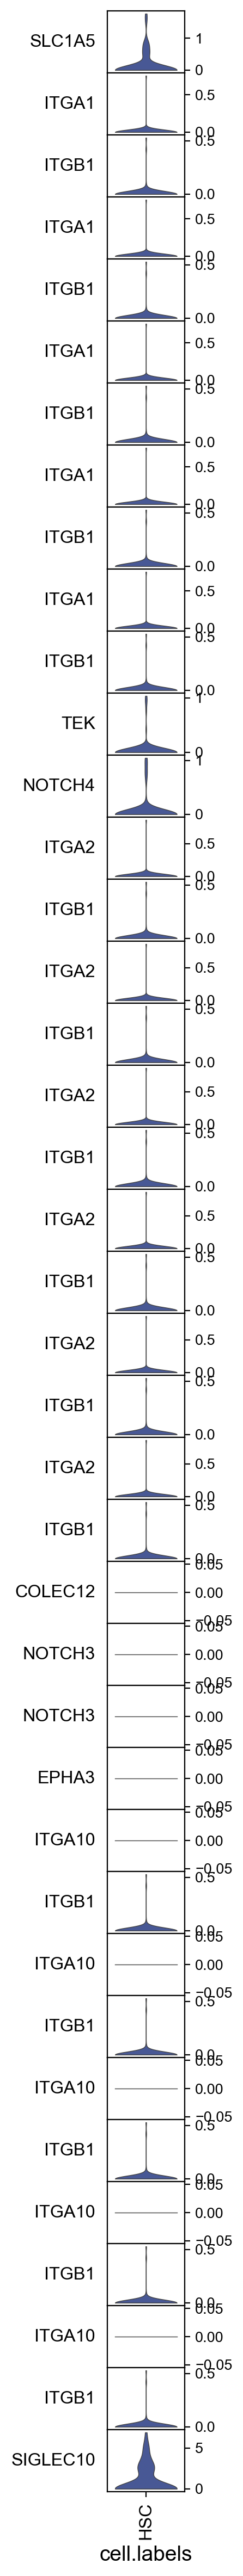

In [22]:
sc.settings.set_figure_params(dpi=100, dpi_save=1000)

genes = HSC_from_HSC_genes

subset = adata[adata.obs['cell.labels'].isin(["HSC"])].copy()

sc.pl.stacked_violin(subset, var_names=genes, save="cpdb_from_hsc_progen_genes_violin_20200722.pdf", 
                     rotation=90, 
                     groupby='cell.labels', use_raw=False, swap_axes=True, figsize=(1,30), 
                     row_palette="#3B50A2")

# Run violin plot (2) for HSC signalling to stroma

In [23]:
stromal_from_HSC_genes = ['LGALS9',
'COL24A1',
'COL9A2',
'COL18A1',
'COL5A1',
'COL6A2',
'ANGPT2',
'DLK1',
'COL24A1',
'COL9A2',
'COL18A1',
'COL5A1',
'COL6A2',
'LGALS9',
'SCGB3A1',
'DLK1',
'EFNA1',
'COL24A1',
'COL9A2',
'COL18A1',
'COL5A1',
'COL6A2',
'CD52']

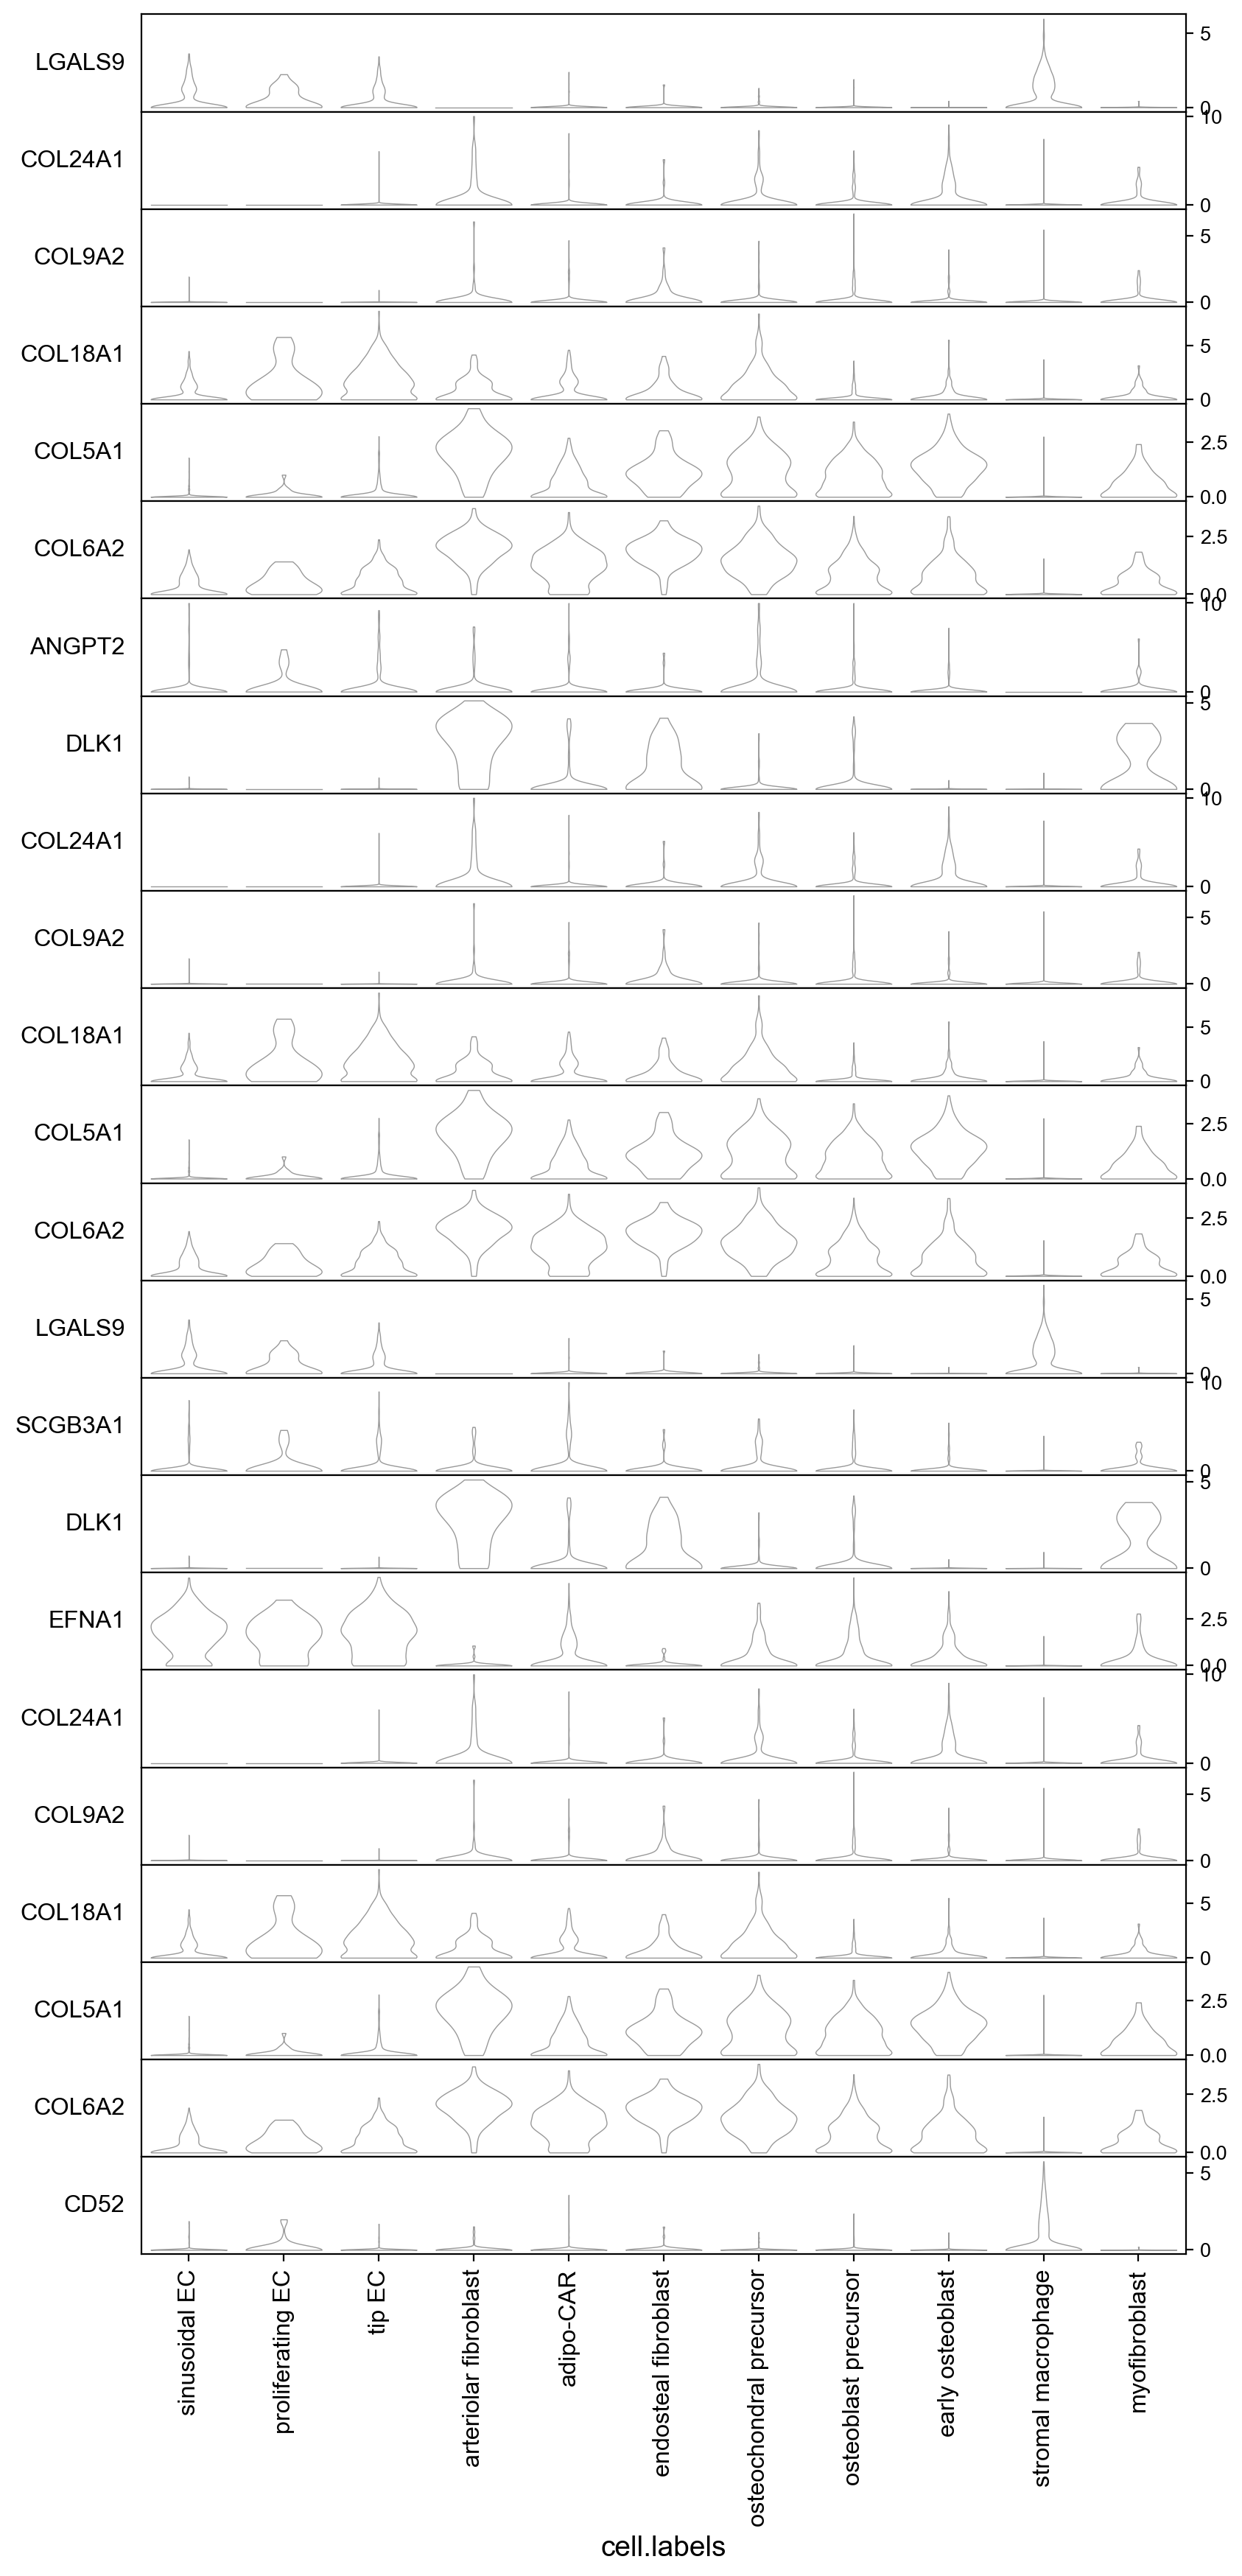

In [24]:
sc.settings.set_figure_params(dpi=100, dpi_save=1000)

subset = adata[adata.obs['cell.labels'].isin(['sinusoidal EC', 'proliferating EC', 'tip EC', 'arteriolar fibroblast',
            'adipo-CAR', 'endosteal fibroblast', 'osteochondral precursor', 'osteoblast precursor', 'early osteoblast',
            'stromal macrophage', 'myofibroblast'])].copy()

subset.obs["cell.labels"] = subset.obs["cell.labels"].cat.reorder_categories(['sinusoidal EC', 'proliferating EC', 'tip EC', 'arteriolar fibroblast',
            'adipo-CAR', 'endosteal fibroblast', 'osteochondral precursor', 'osteoblast precursor', 'early osteoblast',
            'stromal macrophage', 'myofibroblast'])

genes = stromal_from_HSC_genes

sc.pl.stacked_violin(subset, var_names=genes, save="cpdb_stromal_from_hsc_progen_genes_violin_20200722.pdf", 
                     rotation=90, 
                     groupby='cell.labels', use_raw=False, swap_axes=True, figsize=(10,20), 
                     row_palette=['#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', 
                                 '#ffffff', '#ffffff', '#ffffff', '#ffffff'])

# Save the data

In [25]:
from scipy.sparse import csr_matrix
adata.X = scipy.sparse.csr_matrix(adata.X)

In [26]:
adata.X

<6726x33712 sparse matrix of type '<class 'numpy.float32'>'
	with 16112358 stored elements in Compressed Sparse Row format>

In [27]:
adata.raw.X

<6726x33712 sparse matrix of type '<class 'numpy.float32'>'
	with 17941743 stored elements in Compressed Sparse Row format>

In [28]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/figs6f_cpdb_stroma_hsc_violins_20200722.h5ad")